In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import optimize
from datetime import datetime
%matplotlib inline

try:
    import pandas_datareader.data as web
except:
    %pip install pip pandas-datareader
    import pandas_datareader.data as web
  

In [23]:
def Asset(ticker , start, end):
    return(web.get_data_yahoo(ticker, start, end)['Adj Close'])

In [51]:
data = Asset(['AAPL','GOOGL', 'MSFT', 'AMZN'], '2011-01-01', '2021-12-31')
ret = data.pct_change().dropna()
data = data/data.iloc[0]*100

data

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2010-12-31,100.000000,100.000000,100.000000,100.000000
2011-01-03,102.173256,101.747561,100.250818,102.344445
2011-01-04,102.706471,101.372120,100.644935,102.783330
2011-01-05,103.546638,102.542215,100.322472,104.122221
2011-01-06,103.462933,103.288047,103.260478,103.255556
...,...,...,...,...
2021-12-27,1825.785237,995.057562,1556.170970,1885.216607
2021-12-28,1815.255473,986.853275,1550.717841,1896.233317
2021-12-29,1816.166813,986.638027,1553.898856,1880.011122


In [64]:
n = len(data.columns)
returns = []
stds = []
wgt = []
count = 5000

In [65]:
for i in range(count):
    weights = np.random.random(n)
    weights /= sum(weights)
    wgt.append(weights)
    mean = np.sum(weights * ret.mean()*252)
    var = np.dot(weights.T, np.dot(ret.cov()*252, weights))
    cov = np.sqrt(var)    
    returns.append(mean)
    stds.append(cov)
    

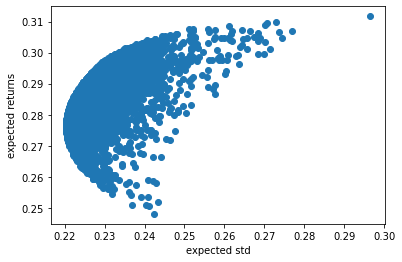

In [66]:
plt.scatter(stds, returns)
plt.xlabel('expected std')
plt.ylabel('expected returns')

plt.show()

In [110]:
wgt2 = pd.DataFrame(wgt, columns = data.columns)
dt = {'Returns':returns, 'Stds': stds}
dt = pd.DataFrame(dt)

eff = pd.concat([dt, wgt2], axis = 1)

eff

,Returns,Stds,AAPL,GOOGL,MSFT,AMZN
0,0.275116,0.226846,0.382664,0.440495,0.057298,0.119544
1,0.272488,0.225754,0.023177,0.357022,0.437999,0.181801
2,0.272332,0.230374,0.034066,0.457029,0.218236,0.290669
3,0.305676,0.246441,0.407604,0.012275,0.080313,0.499807
4,0.279730,0.233068,0.543789,0.351188,0.063686,0.041337
...,...,...,...,...,...,...
4995,0.289427,0.225840,0.405860,0.170990,0.216636,0.206514
4996,0.290213,0.229517,0.431666,0.209376,0.099894,0.259065
4997,0.269263,0.229984,0.065382,0.519691,0.161456,0.253471
4998,0.277357,0.233841,0.110098,0.435789,0.089884,0.364229


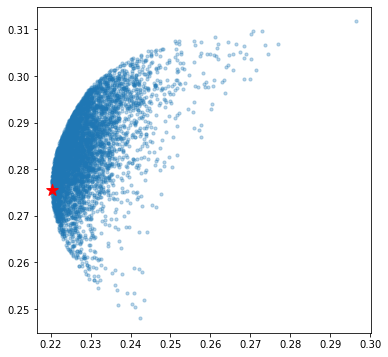

In [117]:
min_vol_port = eff.iloc[eff['Stds'].idxmin()]

plt.subplots(figsize=[6,6])
plt.scatter(eff['Stds'], eff['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=150)


#https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

Returns    0.275556
Stds       0.220297
AAPL       0.232746
GOOGL      0.336442
MSFT       0.322994
AMZN       0.107818
Name: 807, dtype: float64